In [10]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

**Collect the** **Dataset**

In [11]:
!pip install kaggle

In [12]:
mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Re-upload your kaggle.json if needed
from google.colab import files
files.upload()
# Re-upload your kaggle.json if needed


In [37]:
cp /content/kaggle.json ~/.kaggle

In [39]:
!pip install --no-cache-dir kaggle


In [40]:
!kaggle datasets download -d phucthaiv02/butterfly-image-classification

Dataset URL: https://www.kaggle.com/datasets/phucthaiv02/butterfly-image-classification
License(s): CC0-1.0
 89% 202M/226M [00:00<00:00, 574MB/s]
100% 226M/226M [00:00<00:00, 523MB/s]


In [41]:
!chmod 600 /root/.kaggle/kaggle.json


In [42]:
import zipfile

with zipfile.ZipFile("/content/butterfly-image-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")  # You can change the destination


In [43]:
import os
os.listdir("/content/")


['.config',
 'train',
 'butterfly-image-classification.zip',
 '.ipynb_checkpoints',
 'test',
 'Testing_set.csv',
 'kaggle.json',
 'Training_set.csv',
 'sample_data']

**Data Visualization**

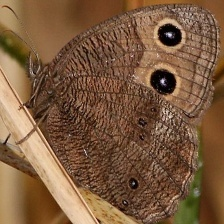

In [44]:
import os
import random
from IPython.display import Image, display

# ✅ Step 1: Set the correct unzipped folder path
folder_path = '/content/train'  # or '/content/your_folder_name/train'

# ✅ Step 2: List image files in the folder (and subfolders)
image_files = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(root, file))

# ✅ Step 3: Select a random image
if image_files:
    selected_image = random.choice(image_files)

    # ✅ Step 4: Display the image
    display(Image(filename=selected_image))
else:
    print("❌ No image files found in the folder.")


In [46]:
import pandas as pd
df = pd.read_csv('/content/Training_set.csv')

In [47]:
df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


**Split the Data and Model Building**

In [48]:
train_dir = '/content/train'
test_dir = '/content/test'

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # Split training into train+validation
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
     fill_mode='nearest'
)


In [50]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    subset='training',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)
val_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    subset='validation',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 5200 validated image filenames belonging to 75 classes.
Found 1299 validated image filenames belonging to 75 classes.


**Model Building**

In [51]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [52]:
vgg = VGG16(include_top = False, input_shape=(224,224,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [53]:
for layer in vgg.layers:
  print(layer)


<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [54]:
len(vgg.layers)

19

In [55]:
for layer in vgg.layers:
   layer.trainable = False

In [56]:
x= Flatten() (vgg.output)

In [57]:
output = Dense (28, activation = 'softmax')(x)

In [58]:
vgg16 = Model (vgg.input,output)

In [59]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [65]:
import pandas as pd

csv_path = '/content/Training_set.csv'
df = pd.read_csv(csv_path)

print(df.head())  # Should show 'filename' and 'label' columns


      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART


**Testing Model and Model Prediction**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, accuracy_score
import os


In [67]:
csv_path = '/content/Training_set.csv'  # ← Update this if needed
df = pd.read_csv(csv_path)
df['image_path'] = '/content/images/' + df['filename']  # ← Update folder path if images are elsewhere

df.head()


,filename,label,image_path
0,Image_1.jpg,SOUTHERN DOGFACE,/content/images/Image_1.jpg
1,Image_2.jpg,ADONIS,/content/images/Image_2.jpg
2,Image_3.jpg,BROWN SIPROETA,/content/images/Image_3.jpg
3,Image_4.jpg,MONARCH,/content/images/Image_4.jpg
4,Image_5.jpg,GREEN CELLED CATTLEHEART,/content/images/Image_5.jpg


In [69]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # same size used in training
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    return np.expand_dims(img_array, axis=0)  # Add batch dimension


In [77]:
df['image_path'] = df['filename'].apply(lambda x: f"/content/train/{x}")


In [70]:
# Get unique class names and index mapping
class_names = sorted(df['label'].unique())
label_to_index = {label: i for i, label in enumerate(class_names)}
index_to_label = {i: label for label, i in label_to_index.items()}


In [78]:
print(df[['image_path']].head())
print("Exists?", os.path.exists(df.iloc[0]['image_path']))


                   image_path
0  /content/train/Image_1.jpg
1  /content/train/Image_2.jpg
2  /content/train/Image_3.jpg
3  /content/train/Image_4.jpg
4  /content/train/Image_5.jpg
Exists? True


**Prediction**

In [82]:
img = preprocess_image(df.iloc[0]['image_path'])
pred = vgg16.predict(img)
predicted_index = np.argmax(pred)
predicted_label = index_to_label[predicted_index]

print(f"🔍 True: {df.iloc[0]['label']}, Predicted: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
🔍 True: SOUTHERN DOGFACE, Predicted: BROWN SIPROETA


In [ ]:
from keras.preprocessing import image
import numpy as np

# ✅ Set image path
img_path = "/content/train/Image_2255.jpg"

# ✅ Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize (same as during training)

# ✅ Predict using your loaded model
predictions = vgg16.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]

predicted_class_name = index_to_label[predicted_class_index]

# ✅ Print the results
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Name: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Predicted Class Index: 11
Predicted Class Name: BLUE SPOTTED CROW


**Saving the Model**

In [84]:
vgg16.save('vgg16_model.h5')